Στο πρώτο κελί θα φορτώσουμε τις βιβλιοθήκες που χρειαζόμαστε:
Η βιβλιοθήκη matplotlib (τη φορτώνουμε σαν plt) είναι μια βιβλιοθήκη γραφικών (διαγράμματα κλπ) που μπορεί να κάνει παπάδες (. Μέσω της εντολής:
```python
%matplotlib inline
``` 
λέμε στη Jupyter να τυπώνει τα διαγράμματα μέσα στο notebook.

Η βιβλιοθήκη seaborn είναι μια νέα βιβλιοθήκη γραφικών που πατάει πάνω στη matplotlib και έχει κάποιες αισθητικές διορθώσεις. Απλά την φορτώνουμε και δεν χρειάζεται να κάνουμε κάτι παραπάνω.

Η numpy είναι η πιο σημαντική βιβλιοθήκη για επιστημονικό προγραμματισμό. Στο πυρήνα της είναι το numpy array οι πίνακες δηλαδή που μετατρέπουν τις λίστες της python σε πίνακες-διανύσματα δηλαδή μαθηματικά αντικείμενα. Είναι δηλαδή η βιβλιοθήκη που έκανε τη Python must για επιστημονικό προγραμματισμό.
Τη φορτώνουμε σαν np, δηλαδή αν θέλουμε να καλέσουμε πχ τη συνάρτηση cos() θα το κάνουμε μέσω της εντολής np.cos(). Θα μπορούσαμε να φορτώσουμε εξ ολοκλήρου τη βιβλιοθήκη numpy μέσω της:
```python
from numpy import *
``` 
το οποίο θα σήμαινε ότι αν γράφαμε cos(pi) θα υπολόγισε το συνιμήτονο της γωνίας π μέσω της συνάρτησης cos μέσα στο numpy. Κατά τη γνώμη μου αυτο δεν ενδείκνυται καθώς μπορεί κάποιος να θέλει να ορίσει τη συνάρητηση cos με διαφορετικούς τρόπους. Για παράδειγμα αν κάποιος χρησιμοποιεί ταυτόχρονα τη βιβλιοθήκη Sympy που είναι για συμβολικό προγραμματισμό (αντίστοιχα με mathematica) τότε υπάρχει και μια συναρτηση cos ειδική για συμβολικό προγραμματισμό που δεν έχει καμια σχέση με τη numerical cos. Έτσι καλο θα ειναι να έχουμε μια np.cos(pi) και μια πχ sm.cos(pi).

Επίσης απο τη numpy θα φορτώσουμε και την υποβιβλιοθήκη παραγωγής τυχαίων αριθμών numpy.random σαν rnd. Αν δεν το κάναμε αυτό απλά αν θελάμε πχ να χρησιμοποιήσουμε τη rand() (που παράγει ενα τυχαιο αριθμό μεταξύ [0-1]) θα γράφαμε np.random.rand(). Εμεις για οικονομία χρονου ορίζουμε την υποβιβλιοθήκη σαν rnd άρα αντιστοιχα τώρα θα καλούμε rnd.rand().

Στη βιβλιοθήκη tqdm δεν χρειάζεται να δώσεται σημασία, είναι ενα ωραίο Module που φτιάχνει μια μπάρα όσο τρέχει μια λουπα για να κρίνεις πόση ώρα μπορει να πάρει.

In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import seaborn
from tqdm import tqdm,tqdm_gui

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Παράμετροι
Εδώ ορίζουμε κάποιες παραμέτρους (έχω βάλει τελείως τυχαίους):
* size ο αριθμός των φωτονίων
* R η ακτίνα του αστέρα (απορία: μας έδωσε τίποτα τιμές ο Μαστιχιαδης?)
* n η αριθμητική πυκνότητα των σκεδαστων
* sigma η ενεργό διατομή
* absorption_prob  πιθανότητα κατα μια αλληλεπίδραση το φωτόνιο να απορροφηθή αντι να σκεδαστεί.

In [2]:
size =10000
R=30 
n=1 
sigma=0.1
absorption_prob=0.1

Εδώ ορίζουμε τη συνάρτηση οπτικού βάθους:
$$
\text{optical_depth}(L) = \tau (L) = n \sigma L
$$
και τη πιθανότητα αλληλεπιδρασης:
$$
\text{interaction_prob}(L) = 1- e^{-\tau (L)}
$$

In [3]:
def optical_depth(L):
    return n*sigma*L
def interaction_prob(L):
    return 1-np.exp(-optical_depth(L))

### Πιθανότητα αλληλεπίδρασης συναρτήση της απόστασης (μέχρι R)

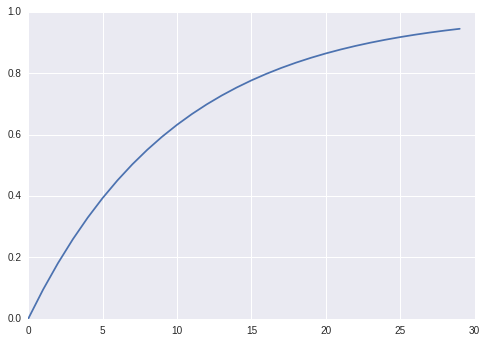

In [4]:
L=np.arange(R)
plt.plot(L,interaction_prob(L))

Τώρα υπολογίζουμε τη μέση ελεύθερη διαδρομή:
$$
\text{l_mean} = l=-(n \sigma)^{-1}
$$

In [5]:
l_mean=(n*sigma)**(-1)
print 'Μέση ελεύθερη διαδρομή: %f'%l_mean
print 'Πιθανότητα αλληλεπίδρασης σε μια ελάχιστη διαδρομή: %f'%interaction_prob(l_mean)
print 'Pιθανότητα αλληλεπίδρασης σε μια ακτίνα αστέρα: %f'%interaction_prob(R)

Μέση ελεύθερη διαδρομή: 10.000000
Πιθανότητα αλληλεπίδρασης σε μια ελάχιστη διαδρομή: 0.632121
Pιθανότητα αλληλεπίδρασης σε μια ακτίνα αστέρα: 0.950213


Θα χρησιμοποιήσω μια διαφορετική τεχνική από αυτή που μας πρότεινε ο μαστιχιάδης, αντί να υπολογίσω την απόσταση από το κάθε σημείο μέχρι την ακτίνα του αστέρα θα χωρίζω τη διαδρομή σε μικρά διαστήμα δL ίσα με το 1/10 της μέσης ελεύθερης διαδρομής:

In [6]:
dL=l_mean/10.
print 'δL: %f'%dL
print 'Πιθανότητα αλληλεπίδρασης σε ένα δL: %f'%interaction_prob(dL)

δL: 1.000000
Πιθανότητα αλληλεπίδρασης σε ένα δL: 0.095163


## Αλγοριθμος Monte Carlo
Αρχικά ορίζουμε μια λίστα γεμάτη άσσους ίση με τον αριθμό των φωτονίων.
Ορίζουμε μια λογική μεταβλητη draw_photons η οποία δρα σαν flag στο κώδικα έτσι ώστε να αποθηκεύει για κάθε φωτόνιο όλες τις θέσεις του (για να μπορούμε μετα να το ζωγραφίσουμε). Προφανώς αυτό το κάνουμε μόνο για να δούμε πως λειτουργεί και με λίγα φωτόνια, αλλιώς αν ορίζαμε 1 εκατομμύριο φωτόνια θα το κλαιγαμε... 


Ο αλγόριθμός εκτελεί τα εξής βήματα:
* Για κάθε φωτόνιο i
    1. Ορίζουμε αρχική θέση (x,y)=(0,0)
    2. Ορίζουμε αρχική γωνία κίνησης theta=2.*np.pi*rnd.rand()
    3. Όσο οι λογικές μεταβλητές **absorpted** και **escaped** είναι ψευδής, δηλαδή όσο δεν εχει απορροφηθεί ή αποδράσει το φωτόνιο:
    
        * Εξετάζουμε αν ένας τυχαίος αριθμός είναι μεγαλύτερος απο τη πιθανότητα σκέδασης σε βάθος δL, αν είναι ορίζουμε τη νέα θέση απλά προσθέτοντας μια μετακίνηση δL χωρίς να αλλάξει η γωνία. Ταυτόχρονα μετράμε πόσο θα διανύσει τη φωτόνιο κινούμενο σε μια ευθεία.
        
        * Στην διαφορετική περίπτωση που έχουμε αλληλεπίδραση ελέγχουμε αν το φωτόνιο απορροφήθηκε, αν δεν απορροφήθηκε ανανεώνουμε τη θέση του μετακίνωντας το κατα δL σε μια τύχαια όμως γωνία.
        
        * Σε κάθε περίπτωση αν το φωτόνιο φτάσει στην ακτίνα του αστέρα σταματάμε.
        
      * Για να ελεγξουμε τα στατιστικά: σε περίπτωση που το φωτόνιο σκεδαστεί (εστω και μια φορα, αλλάζουμε τον αριθμό 1 στη λίστα με τα φωτόνια με τον αριθμό 0.5, αν απορροφηθεί με τον αριθμό 0. Έτσι στο τέλος θα έχουμε μια λίστα όπου θα περιέχει τιμες 1 (για τα φωτόνια που δεν αλληλεπίδρασαν καθόλου, 0.5 τα φωτόνια που σκεδάστηκαν εστω και μια φορα και 0 τα φωτόνια που απορροφήθηκαν.        
      
Παρακάτω βλέπεται μια πειραματική λειτουργία με 10 φωτόνια όπου έχουμε εκτυπώσει τα αποτελέσματα σε μορφή 

**αριθμος φωτονιου**,**αποσταση που διηνυσε χωρις αλληλεπιδραση**,**x**,**y**

In [7]:
size=10
photons = np.ones(size)
#~~~WARNING~~~~
draw_photon=True
if draw_photon:
    position = [[] for _ in range(size)]
lines=[[] for _ in range(size)]

for i,photon in tqdm(enumerate(photons),unit=' photon'):
    absorpted=False
    escaped=False
    (x,y)=(0,0) #Arxiki Thesi
    theta=2.*np.pi*rnd.rand() #tyxaia arxiki dieuthinsi
    line=0
    while (not absorpted and not escaped):
        while rnd.rand()>interaction_prob(dL):
            if draw_photon:
                position[i].append([x,y])
            (x0,y0)=(x,y)
            (x,y)=(x0+dL*np.cos(theta),y0+dL*np.sin(theta)) #nees syntategmenes xwris allagi gwnias
            line=line+dL
            print i,line,x,y
            if (x**2+y**2>R**2): #Apodrasi
                lines[i].append(line)
                line=0
                escaped=True
                print i,' escaped'
                break
        else:
            lines[i].append(line)
            line=0
            if (rnd.rand()<absorption_prob): #Aporofisi
                photons[i]=0
                absorpted=True
                print i,' absorption'
            else:
                print i,' skedasi'
                photons[i]=0.5 
                if draw_photon:
                    position[i].append([x,y])
                theta = 2.*np.pi*rnd.rand() #tyxaia nea dieuthinsi
                (x0,y0)=(x,y)
                (x,y)=(x0+dL*np.cos(theta),y0+dL*np.sin(theta)) #nees syntetagmenes
                print i,line,x,y
                if (x**2+y**2>R**2): #Apodrasi
                    escaped=True
                    print i,' escaped'        
        
np.histogram(photons)

0 photon [00:00, ? photon/s]

0 1.0 -0.659962545682 0.75129850146
0 2.0 -1.31992509136 1.50259700292
0 3.0 -1.97988763705 2.25389550438
0 4.0 -2.63985018273 3.00519400584
0 5.0 -3.29981272841 3.7564925073
0 6.0 -3.95977527409 4.50779100876
0 7.0 -4.61973781978 5.25908951022
0 8.0 -5.27970036546 6.01038801168
0 9.0 -5.93966291114 6.76168651314
0 10.0 -6.59962545682 7.5129850146
0 11.0 -7.25958800251 8.26428351606
0 12.0 -7.91955054819 9.01558201752
0 13.0 -8.57951309387 9.76688051898
0  skedasi
0 0 -7.62864033448 10.0764624879
0 1.0 -6.6777675751 10.3860444567
0  skedasi
0 0 -6.40128701986 9.42502494466
0  skedasi
0 0 -6.53272818607 10.4163489179
0 1.0 -6.66416935229 11.407672891
0 2.0 -6.7956105185 12.3989968642
0 3.0 -6.92705168471 13.3903208374
0 4.0 -7.05849285093 14.3816448106
0 5.0 -7.18993401714 15.3729687838
0 6.0 -7.32137518335 16.364292757
0 7.0 -7.45281634956 17.3556167302
0 8.0 -7.58425751578 18.3469407034
0 9.0 -7.71569868199 19.3382646766
0 10.0 -7.8471398482 20.3295886498
0 11.0 -7.97858101442 21.3209

 2.89452373769
5 19.0 2.46816876434 3.78215644585
5 20.0 2.92872079766 4.66978915401
5  skedasi
5 0 1.97597768777 4.36601198804
5  skedasi
5 0 1.02588035773 4.05405836417
5 1.0 0.0757830276918 3.74210474029
5 2.0 -0.874314302349 3.43015111642
5 3.0 -1.82441163239 3.11819749254
5 4.0 -2.77450896243 2.80624386866
5 5.0 -3.72460629247 2.49429024479
5 6.0 -4.67470362251 2.18233662091
5  skedasi
5 0 -4.37981276553 1.2268056782
5 1.0 -4.08492190856 0.271274735498
5 2.0 -3.79003105158 -0.684256207209
5 3.0 -3.4951401946 -1.63978714992
5 4.0 -3.20024933762 -2.59531809262
5 5.0 -2.90535848064 -3.55084903533
5 6.0 -2.61046762367 -4.50637997804
5 7.0 -2.31557676669 -5.46191092074
5 8.0 -2.02068590971 -6.41744186345
5 9.0 -1.72579505273 -7.37297280616
5  skedasi
5 0 -2.43526390956 -8.07770959474
5 1.0 -3.14473276639 -8.78244638333
5 2.0 -3.85420162323 -9.48718317192
5 3.0 -4.56367048006 -10.1919199605
5 4.0 -5.27313933689 -10.8966567491
5 5.0 -5.98260819372 -11.6013935377
5 6.0 -6.69207705055 -12.

(array([4, 0, 0, 0, 0, 0, 0, 0, 0, 6]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ]))

Εδώ Ορίζουμε μια συναρτηση που ζωγραφίζει ένα κύκλο, και μια συναρτηση που θα μας δινει λεπτομερειες για τη κίνηση του i φωτονίου.
Η συνάρτηση αυτή τυπώνει τις ευθείες χωρίς αλληλεπίδραση 

απο κάτω τη μέση τιμή των διαδρομών αυτών (για να δούμε πόσο κόντα με τη μέση ελευθερη διαδρομή είναι

και μετα ζωγραφίζει την όλη κινηση.

Ποιο κάτω δίνω μερικά φωτόνια

In [8]:
def xy(r,phi):
  return r*np.cos(phi), r*np.sin(phi)

def examine_photon(n):
    print lines[n]
    print np.mean(lines[n])
    fig= plt.figure(figsize=(6,6))
    
    for i in range(int(R/l_mean)):
        plt.plot( *xy(l_mean+i*l_mean,np.arange(0,2.*np.pi,0.01)), c='r',ls='--' )
    
    X=np.array(position[n])[:,0]
    Y=np.array(position[n])[:,1]
    plt.plot(X,Y)
    plt.plot( *xy(R,np.arange(0,2.*np.pi,0.01)), c='r',ls='-' )

[21.0, 11.0, 18.0, 2.0, 18.0, 0, 10.0, 1.0]
10.125


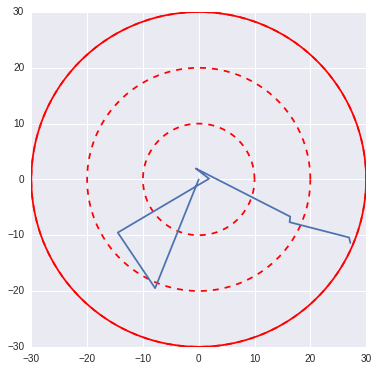

In [9]:
examine_photon(1)

[4.0, 3.0, 16.0, 4.0, 1.0, 4.0, 10.0, 21.0, 10.0, 1.0, 10.0, 10.0, 18.0]
8.61538461538


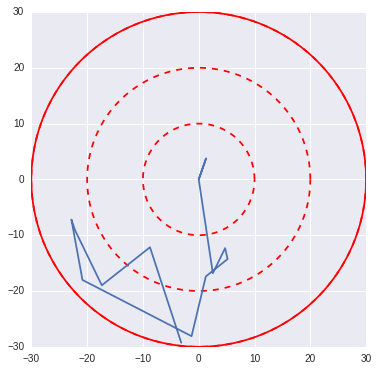

In [10]:
examine_photon(2)

[2.0]
2.0


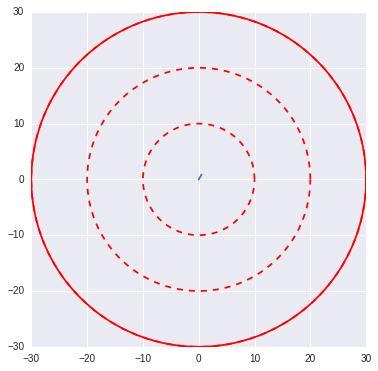

In [11]:
examine_photon(3)

[0, 28.0, 1.0, 3.0]
8.0


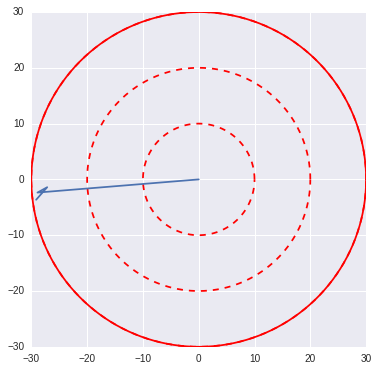

In [12]:
examine_photon(4)

[8.0, 0, 3.0, 11.0, 2.0, 0, 0, 16.0, 10.0, 5.0, 20.0, 0, 6.0, 9.0, 6.0, 2.0]
6.125


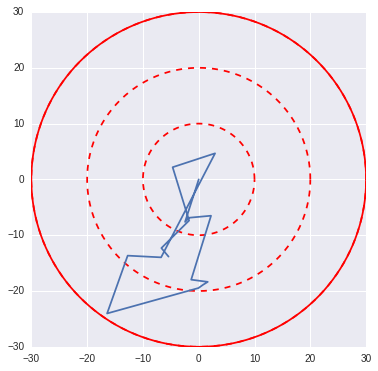

In [13]:
examine_photon(5)

[0, 17.0, 0, 11.0]
7.0


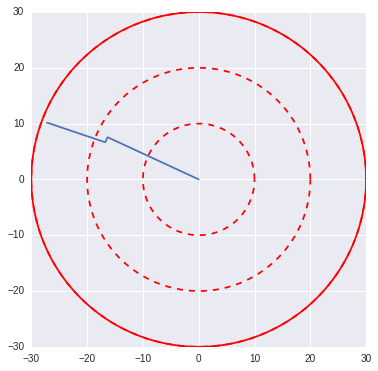

In [14]:
examine_photon(7)

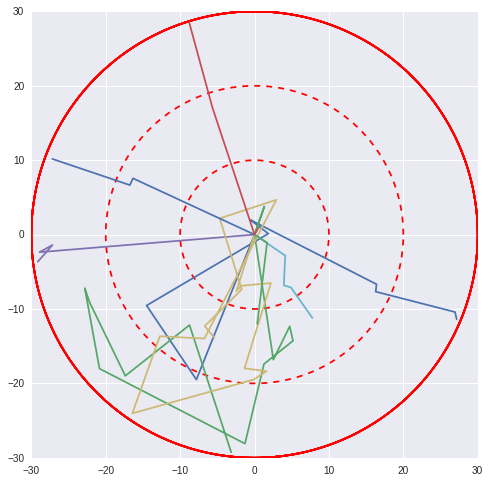

In [15]:
fig= plt.figure(figsize=(8,8))
for i in range(int(R/l_mean)):
    plt.plot( *xy(l_mean+i*l_mean,np.arange(0,2.*np.pi,0.01)), c='r',ls='--' )
for pos in position[1:]:
    X=np.array(pos)[:,0]
    Y=np.array(pos)[:,1]
    plt.plot(X,Y)
    plt.plot( *xy(R,np.arange(0,2.*np.pi,0.01)), c='r',ls='-' )
    

Τώρα θα τρέξουμε τον αλγόριθμό για πολλά φωτόνια.

**upd:** θα μαζέψουμε όλα τα παραπάνω σε μια συνάρτηση για να έχουμε καλύτερο έλεγχο και ευλυγισία.

In [7]:
def interaction_prob(n,sigma,L):
    return 1-np.exp(-n*sigma*L)

def examine_photon(n,l_mean,R):
    print lines[n]
    print np.mean(lines[n])
    fig= plt.figure(figsize=(6,6))
    for i in range(int(R/l_mean)):
        plt.plot( *xy(l_mean+i*l_mean,np.arange(0,2.*np.pi,0.01)), c='r',ls='--' )
    
    X=np.array(position[n])[:,0]
    Y=np.array(position[n])[:,1]
    plt.plot(X,Y)
    plt.plot( *xy(R,np.arange(0,2.*np.pi,0.01)), c='r',ls='-' )
    
def MonteCarlo(size,n=1,sigma=0.1,absorption_prob=0.1,R=30,draw_photon=False,Verbatim=False):
    photons = np.ones(size)
    l_mean=(n*sigma)**(-1)
    dL=l_mean/10.
    
    #~~~WARNING~~~~
    if draw_photon:
        position = [[] for _ in range(size)]
    else:
        position =[]
    lines=[[] for _ in range(size)]

    for i,photon in tqdm(enumerate(photons),unit=' photon'):
        absorpted=False
        escaped=False
        (x,y)=(0,0) #Arxiki Thesi
        theta=2.*np.pi*rnd.rand() #tyxaia arxiki dieuthinsi
        line=0.
        while (not absorpted and not escaped):
            while rnd.rand()>interaction_prob(n,sigma,dL):
                if draw_photon: position[i].append([x,y])
                    
                (x0,y0)=(x,y)
                (x,y)=(x0+dL*np.cos(theta),y0+dL*np.sin(theta)) #nees syntategmenes xwris allagi gwnias
                line=line+dL
                if Verbatim: print i,line,x,y
                    
                if (x**2+y**2>R**2): #Apodrasi
                    lines[i].append(line)
                    line=0
                    escaped=True
                    if Verbatim: print i,' escaped'
                    break
            else:
                lines[i].append(line)
                line=0
                if (rnd.rand()<absorption_prob): #Aporofisi
                    photons[i]=0
                    absorpted=True
                    if Verbatim: print i,' absorption'
                else:
                    if Verbatim: print i,' skedasi'
                    photons[i]=0.5 
                    if draw_photon:
                        position[i].append([x,y])
                    theta = 2.*np.pi*rnd.rand() #tyxaia nea dieuthinsi
                    (x0,y0)=(x,y)
                    (x,y)=(x0+dL*np.cos(theta),y0+dL*np.sin(theta)) #nees syntetagmenes
                    if Verbatim: print i,line,x,y
                        
                    if (x**2+y**2>R**2): #Apodrasi
                        escaped=True
                        if Verbatim: print i,' escaped'        
    return photons,lines,position


In [55]:
photons,lines,position=MonteCarlo(10000)

### Ιστόγραμμα αποτελεσμάτων
Παρακάτω βλέπουμε το ιστόγραμμα της λίστας των φωτονίων. 

Όπως είπαμε και πρίν με 0 (4432 φωτόνια απο τα 10000) είναι τα φωτόνια που αποροφήθηκαν

0.5 είναι η τιμή για τα φωτόνια που σκεδάστηκαν εστω μια φορά (5093 φωτόνια απο τα 10000)

και 1 είναι η τιμή για τα φωτόνια που δεν ενιωσαν τίποτα (475 φωτόνια απο τα 10000)

(array([ 4432.,     0.,     0.,     0.,     0.,  5093.,     0.,     0.,
            0.,   475.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

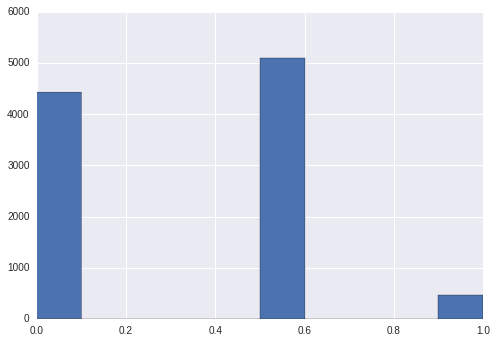

In [56]:
plt.hist(photons)

### Ιστόγραμμα μέσω ελεύθερων διαδρομών
Για κάθε φωτόνιο πέρνουμε το μέσο όρο των ελεύθερων διαδρομών και κάνουμε το ίστογραμμα για όλα τα φωτόνια.

In [57]:
mean_paths = [np.mean(i) for i in lines]

(array([  248.,   186.,   241.,   446.,   724.,  1011.,  1261.,  1056.,
          982.,   853.,   543.,   376.,   327.,   450.,   260.,   156.,
          119.,    69.,    58.,    29.,    35.,    29.,     9.,    12.,
           19.,     7.,     5.,   256.,   231.,     2.]),
 array([  0.        ,   1.08333333,   2.16666667,   3.25      ,
          4.33333333,   5.41666667,   6.5       ,   7.58333333,
          8.66666667,   9.75      ,  10.83333333,  11.91666667,
         13.        ,  14.08333333,  15.16666667,  16.25      ,
         17.33333333,  18.41666667,  19.5       ,  20.58333333,
         21.66666667,  22.75      ,  23.83333333,  24.91666667,
         26.        ,  27.08333333,  28.16666667,  29.25      ,
         30.33333333,  31.41666667,  32.5       ]),
 <a list of 30 Patch objects>)

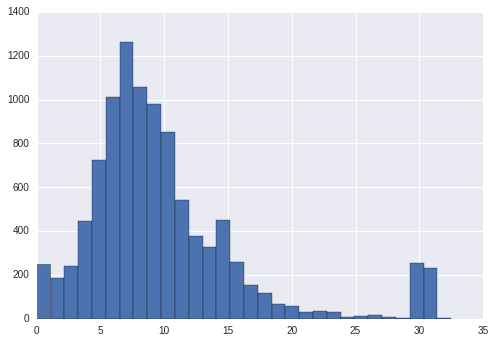

In [58]:
plt.hist(mean_paths,bins=30)

In [12]:
photons,lines,position=MonteCarlo(1000,n=1, sigma=0.1, absorption_prob=0.01, R=60, draw_photon=False, Verbatim=False)

(array([ 186.,    0.,    0.,    0.,    0.,  810.,    0.,    0.,    0.,    4.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

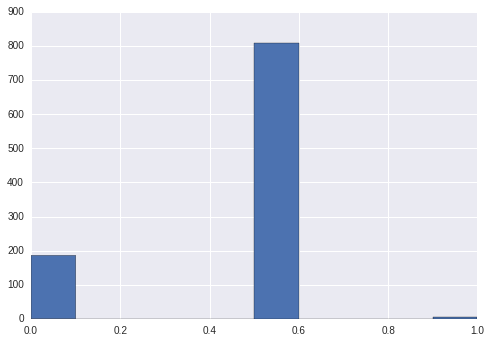

In [13]:
plt.hist(photons)

19.315


(array([   1.,    0.,    4.,    9.,   36.,   99.,  184.,  216.,  167.,
          94.,   64.,   33.,   23.,   18.,   13.,    6.,    8.,    4.,
           4.,    2.,    2.,    2.,    1.,    0.,    3.,    2.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    4.]),
 array([  0.  ,   1.22,   2.44,   3.66,   4.88,   6.1 ,   7.32,   8.54,
          9.76,  10.98,  12.2 ,  13.42,  14.64,  15.86,  17.08,  18.3 ,
         19.52,  20.74,  21.96,  23.18,  24.4 ,  25.62,  26.84,  28.06,
         29.28,  30.5 ,  31.72,  32.94,  34.16,  35.38,  36.6 ,  37.82,
         39.04,  40.26,  41.48,  42.7 ,  43.92,  45.14,  46.36,  47.58,
         48.8 ,  50.02,  51.24,  52.46,  53.68,  54.9 ,  56.12,  57.34,
         58.56,  59.78,  61.  ]),
 <a list of 50 Patch objects>)

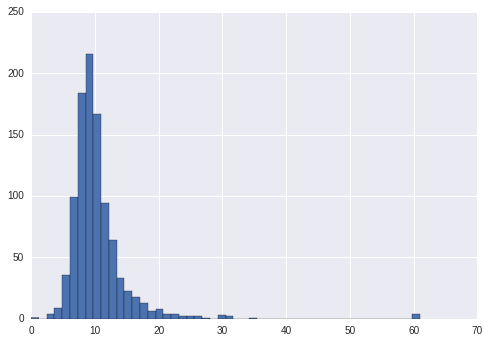

In [14]:
mean_paths = [np.mean(i) for i in lines]
skedasmoi=[len(i) for i in lines]
print np.mean(skedasmoi)
plt.hist(mean_paths,bins=50)

In [30]:
photons[photons<0.4].size

186

### Ποιά η σχέση μεταξύ αριθμού σκεδάσεων και ακτίνας?

###  Η σχέση μεταξύ μέσης ελεύθερης διαδρομής και πιθανοτητας απορροφησης

### Σχέση μεταξύ φωτονίων που δραπέτυεσαν και ακτίνας

In [65]:
RR = np.linspace(2,100,30)
prob = np.linspace(0.,1.,30)
Nphotons=1000
meanL=np.zeros((RR.shape[0],prob.shape[0]))
Ns=np.zeros((RR.shape[0],prob.shape[0]))
Nd=np.zeros((RR.shape[0],prob.shape[0]))
for i,R in enumerate(RR):
    for j,p in enumerate(prob):
        photons,lines,position=MonteCarlo(Nphotons,absorption_prob=p, R=R)
        mean_paths = [np.mean(k) for k in lines]
        skedasmoi=[len(v) for v in lines]
        
        meanL[i,j]=np.mean(mean_paths)
        Ns[i,j]=np.mean(skedasmoi)
        Nd[i,j]=(Nphotons-photons[photons<0.4].size)

In [141]:
a=prob[5]

In [147]:
a.round(3)

0.17199999999999999

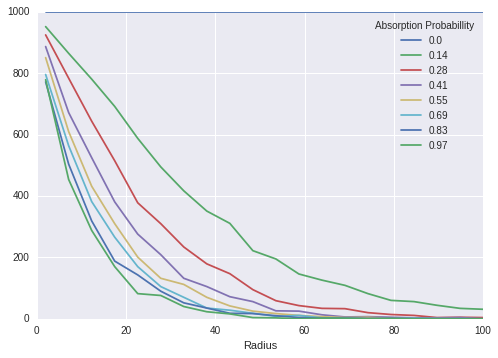

In [152]:
for i in range(0,len(prob),4):
    plt.plot(RR,Nd[:,i],label=prob[i].round(2))
    #plt.yscale('log')
    plt.xlabel('Radius')
    plt.legend(loc='best',title='Absorption Probabillity')

In [70]:
from mpl_toolkits.mplot3d import Axes3D

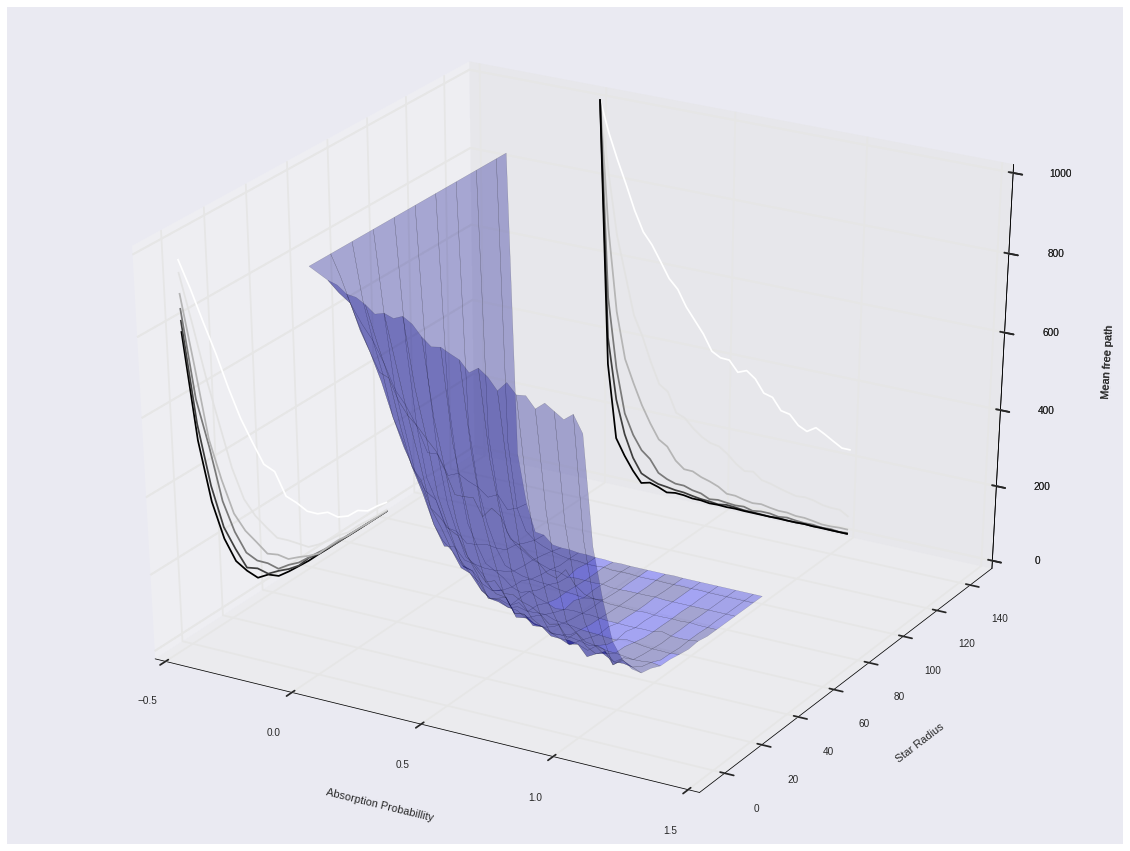

In [117]:
fig = plt.figure(figsize=(20,15))
X,Y=np.meshgrid(prob,RR)
Z=Nd
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y,Z,rstride=2, cstride=2, alpha=0.3)
#cset = ax.contour(X, Y, Z, zdir='z', offset=-Z.max()*0.2)
cset = ax.contour(X, Y, Z, zdir='x', offset=-0.5)
cset = ax.contour(X, Y, Z, zdir='y', offset=150)

ax.set_xlabel('Absorption Probabillity')
ax.set_xlim(-0.5, 1.5)
ax.set_ylabel('Star Radius')
ax.set_ylim(-10, 150)
ax.set_zlabel('Mean free path')
#ax.set_zlim(-Z.max()*0.2, Z.max()*1.1)